#                                                COVID-19 

In [762]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [763]:
#importing csv data
df=pd.read_csv('Covid - 19.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [764]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Observation : 

Data have object, float64 and int64 data types.

In [765]:
#Data Seperated based on data type
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Confirmed', 'Deaths', 'FIPS', 'UID'], dtype='object'),
 dtype('float64'): Index(['Lat', 'Long_', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
        'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
        'Hospitalization_Rate'],
       dtype='object'),
 dtype('O'): Index(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], dtype='object')}

# Summary Statistics

In [766]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation :

There are some missing data in Lat, Long, Recovered, Incident Rate,People tested,, People Hospitalized, Moratlity Rate, Testing_Rate and Hospitalization_Rate.

# EDA

In [767]:
#checking nan values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [768]:
#checking nan values in each row
df[pd.isnull(df).any(axis = 1)]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,NaN,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.6431,39801,1697,NaN,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


To find recovered cases :

Recovered=  Confirmed - Deaths - Active

In [769]:
#Adding new column in df
df['Recovered_new']= df['Confirmed']-df['Deaths']-df['Active']

In [770]:
df.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Recovered_new
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,0.0
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,352.0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,0.0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,3773.0
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,3852.0
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN,0.0
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774,3478.0
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438,6264.0
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN,3965.0
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN,0.0


In [771]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'Recovered_new'],
      dtype='object')

In [772]:
#Dropping recovered column
df.drop('Recovered',axis=1,inplace=True)

In [773]:
#Rearranging columns
df=df[['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed','Recovered_new', 'Deaths', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate']]

In [774]:
#checking nan values in each row
df[pd.isnull(df).any(axis = 1)]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered_new,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,10,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,0.0,3497,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,3965.0,310,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0.0,0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,1059.0,407,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,0.0,3,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
14,Guam,US,2020-05-21 02:32:54,13.4443,144.7937,154,125.0,5,24.0,66,93.771502,4972.0,NaN,3.246753,316,GUM,3027.479921,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,100418,0.0,4525,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
19,Iowa,US,2020-05-21 02:32:54,42.0115,-93.2105,15620,8362.0,393,6865.0,19,495.076179,110748.0,NaN,2.516005,84000019,USA,3510.159838,NaN


In [775]:
#Removing Two rows from dataframe
df.drop(df[df['Province_State'] == 'Diamond Princess'].index, inplace = True) 
df.drop(df[df['Province_State'] == 'Grand Princess'].index, inplace = True) 

Reason :

Removed above two rows because we don't have total population data, so we cannot calculate incident rate and people tested data also missing, so  we cannot calulate testing rate.

In [776]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Recovered_new            0
Deaths                   0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
People_Hospitalized     23
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             0
Hospitalization_Rate    23
dtype: int64

In [777]:
#filling nan values for Moratlity Rate
df['Mortality_Rate'] = df['Mortality_Rate'].fillna(0)

Reason :

American Samoa don't have confirmed case and death, so moratality rate will be zero.

### Removing Columns

In [778]:
#droping column People_Hospitalized and Hospitalization_Rate
df.drop(['People_Hospitalized','Hospitalization_Rate'],axis=1,inplace=True)

Reason :`

People_Hospitalized and Hospitalization_Rate don't have cumulative data in covid tracking project, so they are removed.

In [779]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered_new,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,0.0,522,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,10,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0,0.0,60,0.000000,124.0,0.000000,16,ASM,222.857246
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,3773.0,747,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,3852.0,107,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370


In [780]:
#Finding unique values in objects
obj_col=['Province_State', 'Country_Region', 'Last_Update', 'ISO3']
for oc in obj_col:
    print(df[oc].value_counts())
    print('------------------------------------------------------------------------------------')

New Mexico                  1
New York                    1
Wyoming                     1
District of Columbia        1
Puerto Rico                 1
Colorado                    1
South Dakota                1
Rhode Island                1
Arizona                     1
Maine                       1
Pennsylvania                1
Iowa                        1
Virgin Islands              1
Florida                     1
Minnesota                   1
Kansas                      1
Washington                  1
Connecticut                 1
Guam                        1
South Carolina              1
Alaska                      1
Louisiana                   1
Montana                     1
Alabama                     1
Virginia                    1
Nevada                      1
Nebraska                    1
American Samoa              1
Utah                        1
Kentucky                    1
Oklahoma                    1
Arkansas                    1
North Carolina              1
Michigan  

Observation:

Province State has different unique values.

Country_Region is US for all rows.

ISO has US for most of the rows.

Last Update has constant value for all rows.

In [781]:
#Dropping Last Update, Country_Region, UID
df.drop(['Country_Region', 'UID', 'FIPS'],axis=1,inplace=True)

In [782]:
df.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Recovered_new,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,Alabama,2020-05-21 02:32:54,32.3182,-86.9023,13052,0.0,522,12530.0,266.194321,164450.0,3.999387,USA,3353.942386
1,Alaska,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,10,39.0,54.815493,37045.0,2.493766,USA,5063.940017
2,American Samoa,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0,0.0,0.000000,124.0,0.000000,ASM,222.857246
3,Arizona,2020-05-21 02:32:54,33.7298,-111.4312,14906,3773.0,747,10386.0,204.788838,165435.0,5.011405,USA,2272.859351
4,Arkansas,2020-05-21 02:32:54,34.9697,-92.3731,5003,3852.0,107,1044.0,165.782801,96258.0,2.138717,USA,3189.670370


# Visualization

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C58565CE50>,
      dtype=object)

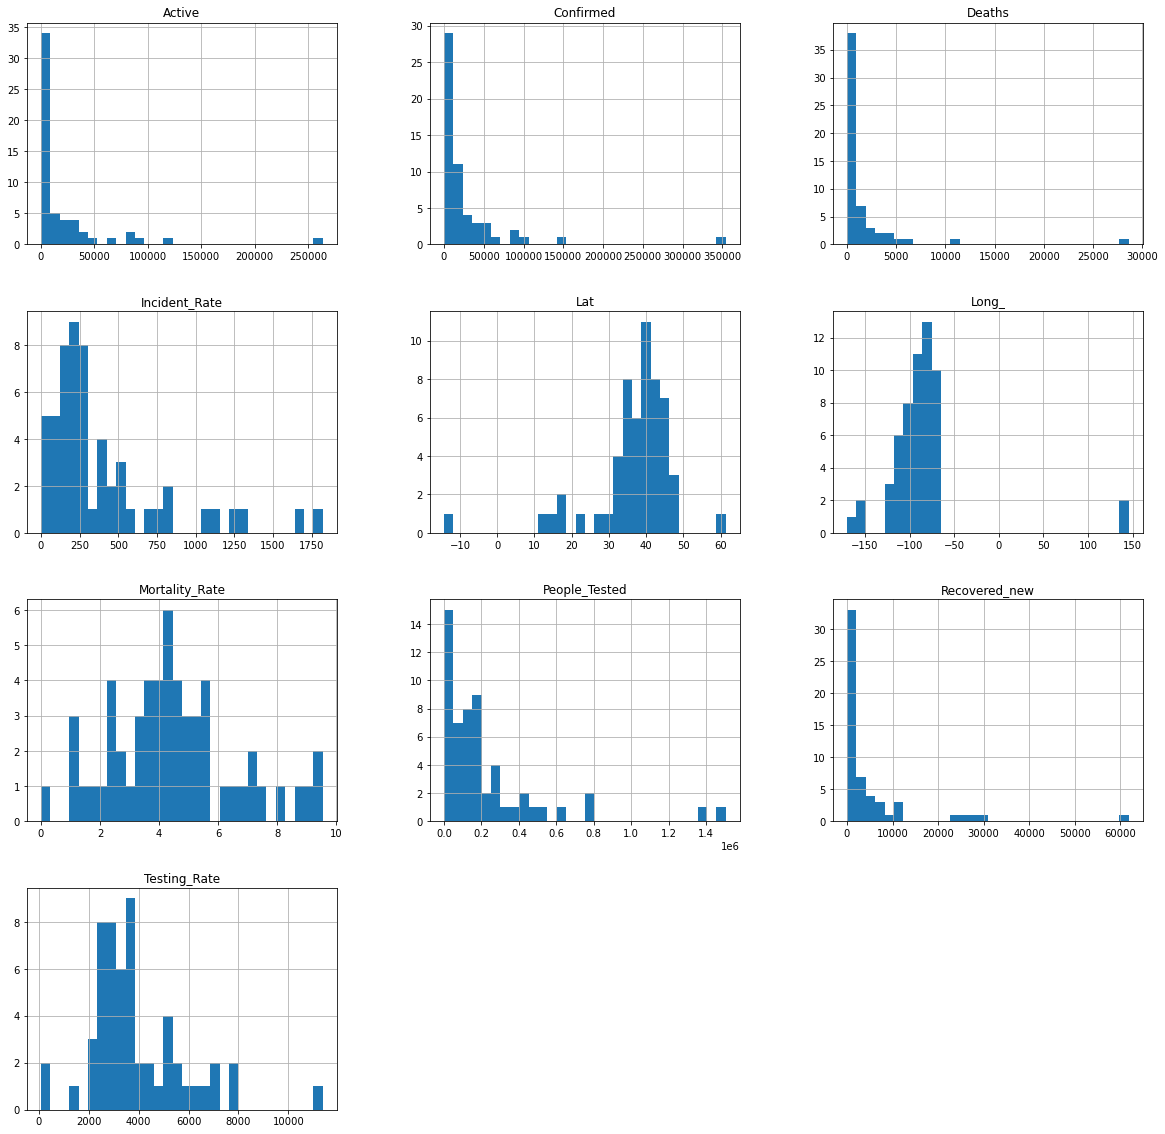

In [783]:
#Visualization of Recovered cases
df.hist(figsize=(20,20),grid=True,bins=30)

Observation : 

Confirmed, Deaths, Revovered and Active are right skewed.

FIPS is unique identifier for every province state, so it has large distribution.

Moratality rate has slight normal distribution.

Testing rate is slightly right skewed.

### Bivariate Analysis

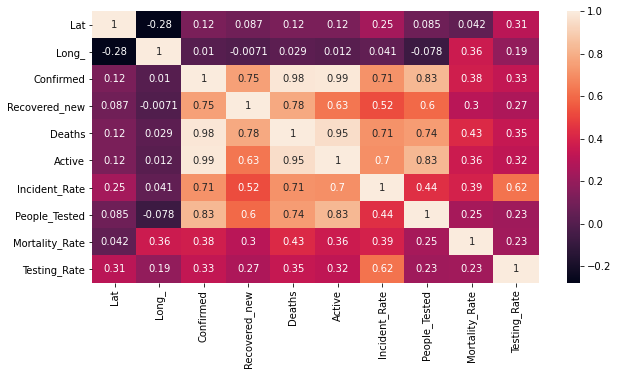

In [784]:
corr_test=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_test,annot=True)

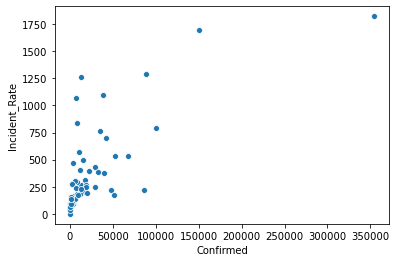

In [785]:
#Visualization of Confirmed and Incident Rate
sns.scatterplot(x='Confirmed',y='Incident_Rate', data =df)

Observation :`

As confirmed cases increases, incident rate also increasing.

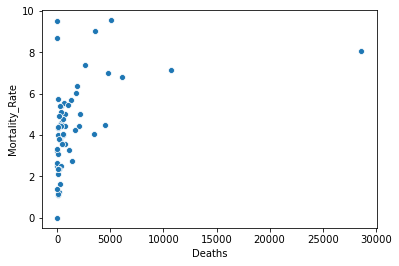

In [786]:
#Visualization of Deaths and Mortality Rate
sns.scatterplot(x='Deaths',y='Mortality_Rate', data =df)

Observation :`

Moratality rate is high when number of deaths are low.

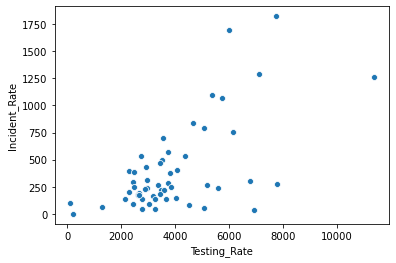

In [787]:
#Visualization of Testing Rate and Incident Rate
sns.scatterplot(x='Testing_Rate',y='Incident_Rate', data =df)

Observation :

As Testing rate increases, Incident rate also increasing.

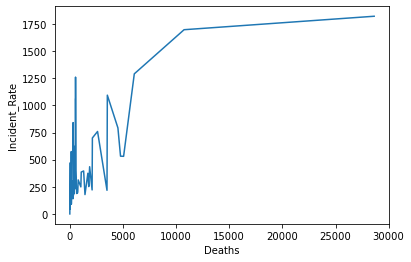

In [788]:
#Visualization of Confirmed and Incident Rate
sns.lineplot(x='Deaths',y='Incident_Rate', data =df)

When death count is increasing, Incident rate also increases.

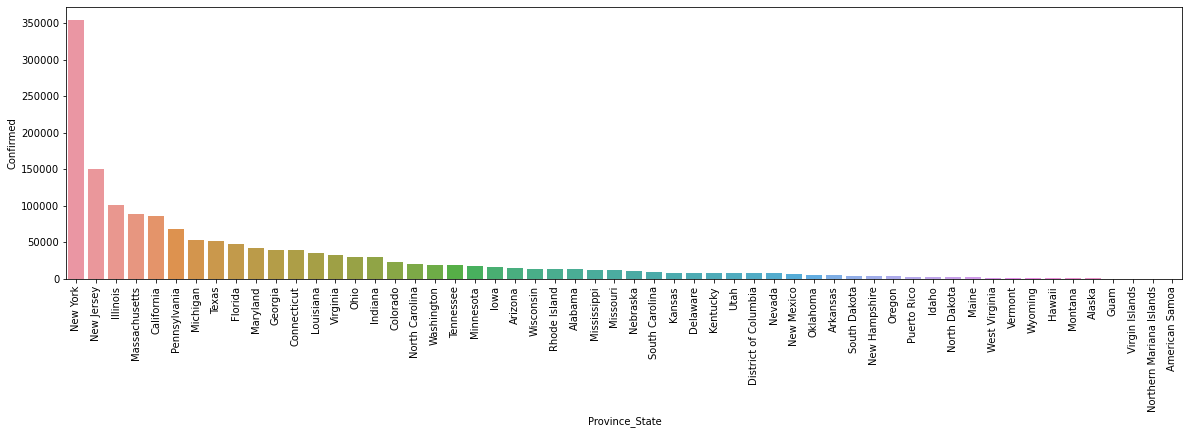

In [789]:
plt.figure(figsize=(20,5))
t=sns.barplot(x='Province_State',y='Confirmed',data=df.sort_values(by='Confirmed', ascending=False))
plt.setp(t.get_xticklabels(), rotation=90)
plt.show()

Observation : 

New York has maximum confirmed Covid cases.

American Samoa has no confirmed Covid Cases.

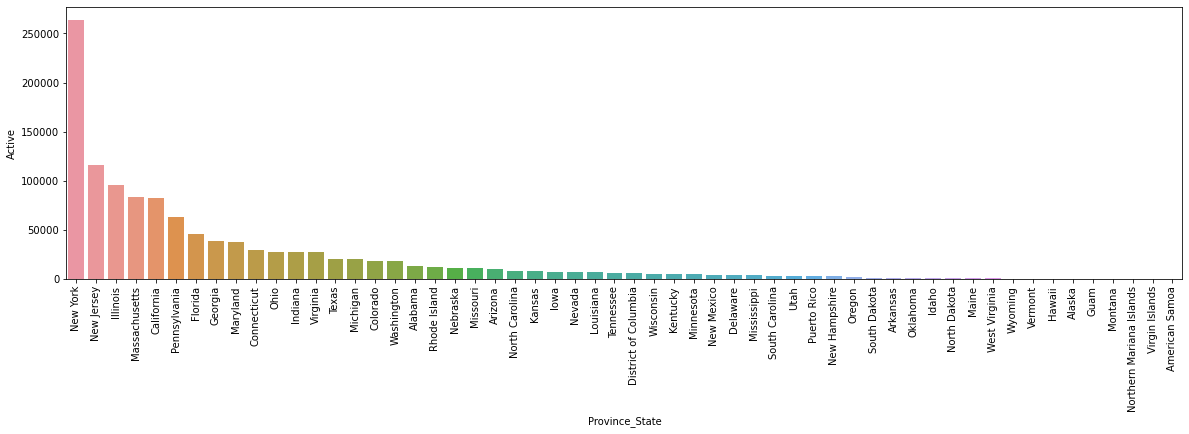

In [790]:
plt.figure(figsize=(20,5))
t=sns.barplot(x='Province_State',y='Active',data=df.sort_values(by='Active', ascending=False))
plt.setp(t.get_xticklabels(), rotation=90)
plt.show()

Observation :

New York and New Jersey have maximum Active cases.

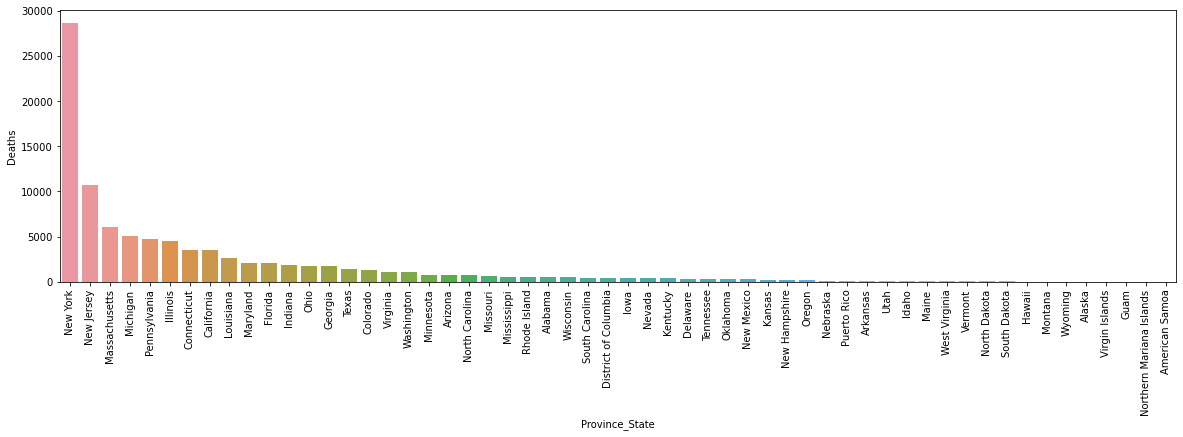

In [791]:
plt.figure(figsize=(20,5))
t=sns.barplot(x='Province_State',y='Deaths',data=df.sort_values(by='Deaths', ascending=False))
plt.setp(t.get_xticklabels(), rotation=90)
plt.show()

Observation :

New York and New Jersey have maximum deaths.

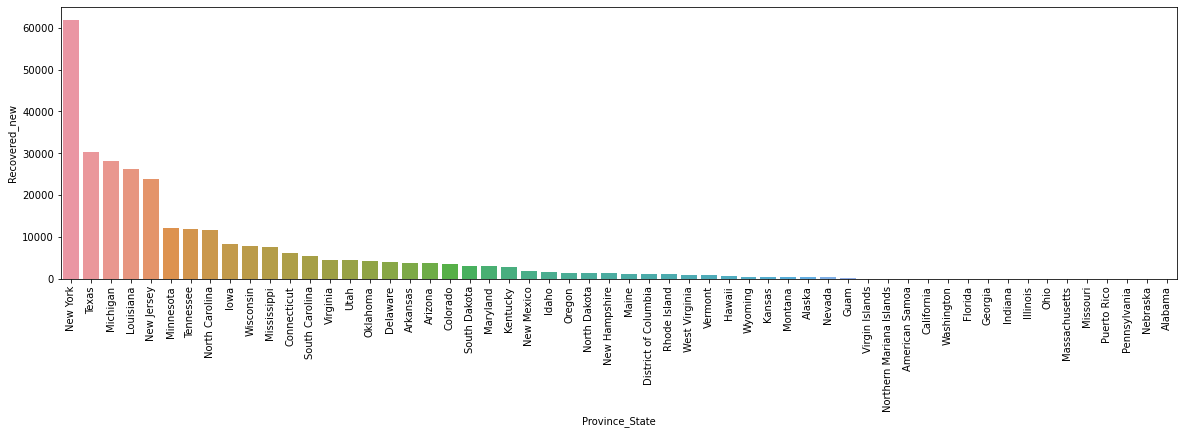

In [792]:
plt.figure(figsize=(20,5))
t=sns.barplot(x='Province_State',y='Recovered_new',data=df.sort_values(by='Recovered_new', ascending=False))
plt.setp(t.get_xticklabels(), rotation=90)
plt.show()

Observation :

New York, Texas and Michigan have maximum recovered cases.

In [793]:
confirmed = df.groupby('Last_Update').sum()['Confirmed'].reset_index()
deaths = df.groupby('Last_Update').sum()['Deaths'].reset_index()
recovered = df.groupby('Last_Update').sum()['Recovered_new'].reset_index()

In [794]:
import plotly.graph_objs as go

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Last_Update'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=20)))
fig.add_trace(go.Scatter(x=deaths['Last_Update'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=20)))
fig.add_trace(go.Scatter(x=recovered['Last_Update'], y=recovered['Recovered_new'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=20)))
fig.update_layout(title='US COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

Observation :

Recovered cases is more than Deaths.

In [795]:
#Dropping Last_Update column
df.drop(['Last_Update'], axis=1, inplace=True)

# Label Encoding

In [796]:
#Transforming categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
lab_col=['Province_State','ISO3']
for lab in lab_col:
    df[lab]=encoder.fit_transform(df[lab])

In [797]:
df.head()

,Province_State,Lat,Long_,Confirmed,Recovered_new,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,0,32.3182,-86.9023,13052,0.0,522,12530.0,266.194321,164450.0,3.999387,4,3353.942386
1,1,61.3707,-152.4044,401,352.0,10,39.0,54.815493,37045.0,2.493766,4,5063.940017
2,2,-14.2710,-170.1320,0,0.0,0,0.0,0.000000,124.0,0.000000,0,222.857246
3,3,33.7298,-111.4312,14906,3773.0,747,10386.0,204.788838,165435.0,5.011405,4,2272.859351
4,4,34.9697,-92.3731,5003,3852.0,107,1044.0,165.782801,96258.0,2.138717,4,3189.670370


## Outliers

Province_State        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Lat                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Long_              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Confirmed          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recovered_new        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Deaths            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Active            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Incident_Rate     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
People_Tested        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Mortality_Rate    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
ISO3              AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Testing_Rate      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

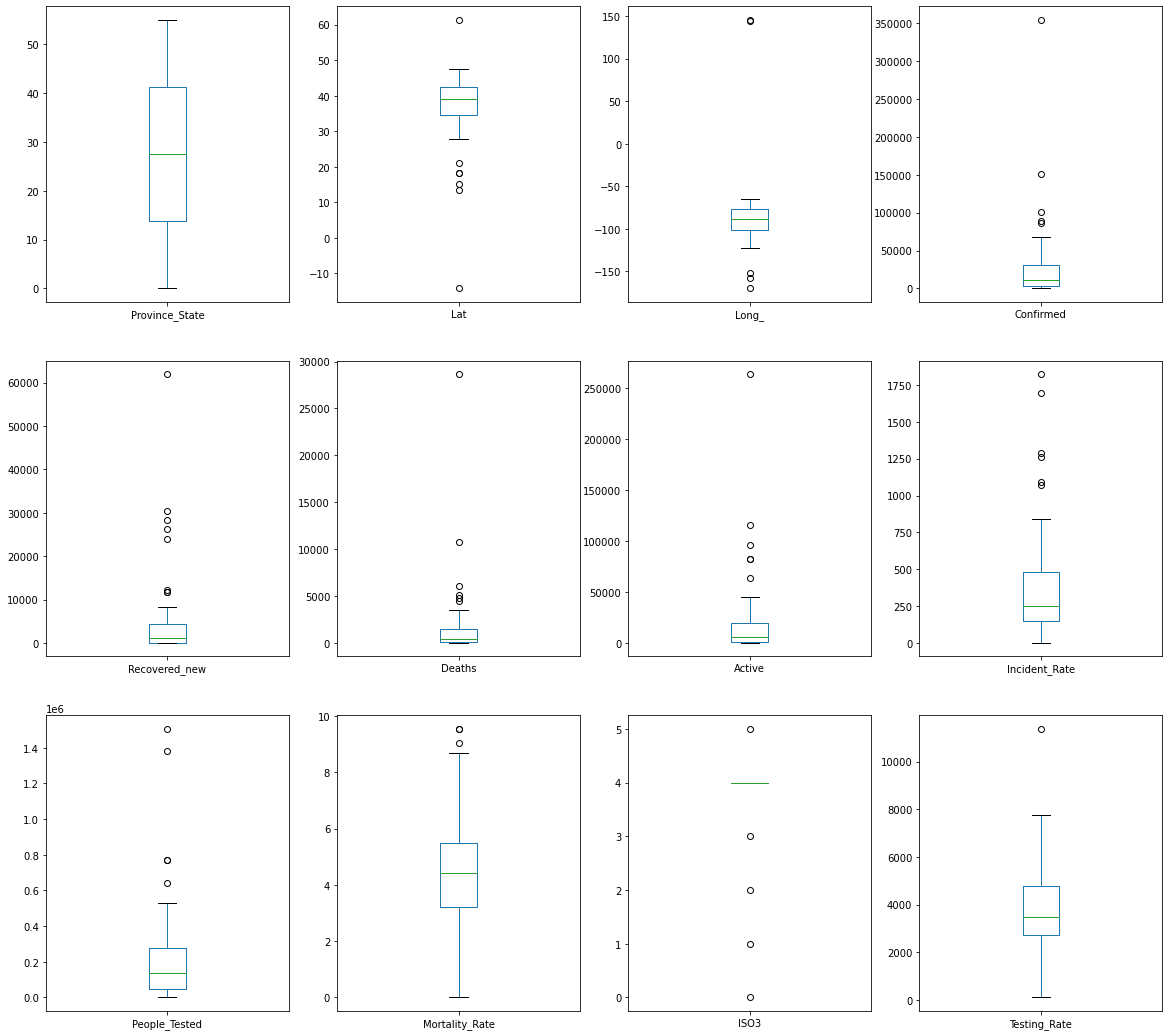

In [798]:
#Box Plot visualization for all columns
df.plot(figsize=(20,25),kind='box',layout=(4,4),subplots=True)

Observation :

All columns have outliers.`

## Skewness

In [799]:
new_df=df.copy()

In [800]:
#Checking Skewness
new_df.skew()

Province_State    0.000000
Lat              -2.213092
Long_             3.509241
Confirmed         4.646063
Recovered_new     3.587378
Deaths            5.404018
Active            4.116348
Incident_Rate     1.955650
People_Tested     2.783163
Mortality_Rate    0.462024
ISO3             -4.045875
Testing_Rate      1.291806
dtype: float64

In [801]:
new_df.isnull().sum()

Province_State    0
Lat               0
Long_             0
Confirmed         0
Recovered_new     0
Deaths            0
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
ISO3              0
Testing_Rate      0
dtype: int64

# Model  for Recovered

In [802]:
#Input and target varialbel
X_rec=new_df.drop(['Recovered_new'],axis=1)
Y_rec=new_df[['Recovered_new']]

In [803]:
X_rec.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,0,32.3182,-86.9023,13052,522,12530.0,266.194321,164450.0,3.999387,4,3353.942386
1,1,61.3707,-152.4044,401,10,39.0,54.815493,37045.0,2.493766,4,5063.940017
2,2,-14.2710,-170.1320,0,0,0.0,0.000000,124.0,0.000000,0,222.857246
3,3,33.7298,-111.4312,14906,747,10386.0,204.788838,165435.0,5.011405,4,2272.859351
4,4,34.9697,-92.3731,5003,107,1044.0,165.782801,96258.0,2.138717,4,3189.670370


In [804]:
Y_rec.head()

,Recovered_new
0,0.0
1,352.0
2,0.0
3,3773.0
4,3852.0


In [805]:
print(X_rec.shape)
print(Y_rec.shape)

(56, 11)
(56, 1)


### Scaling

In [806]:
#scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX=sc.fit_transform(X_rec)

In [807]:
#importing libraries for models
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

best_rstate=0
accu=0
best_model=[]
mod=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),SVR(), BayesianRidge()]
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(ScaledX,Y_rec,test_size=0.33,random_state=i)
    for m in mod:
        m.fit(x_train,y_train.values.ravel())
        y_pred=m.predict(x_test)
        tempaccu=r2_score(y_test,y_pred)
        if tempaccu>accu:
            accu=tempaccu
            best_rstate=i
            best_model=m
            print(f"best accuracy : {accu*100} found on the random state {best_rstate}, best model is {m}")
            
print(f"-----best accuracy : {accu*100} found on the random state {best_rstate}, best model is {m}----")

best accuracy : 100.0 found on the random state 1, best model is LinearRegression()
-----best accuracy : 100.0 found on the random state 1, best model is BayesianRidge()----


Observation :

BayesianRidge is the best model but it is overfitted.

# Hyperparameter Tuning

In [808]:
#Grid Search CV for Random forest regressor
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(ScaledX,Y_rec,test_size=0.33,random_state=1)
parameters ={
    'alpha_1': [1, 10],
    'fit_intercept':(0,1.99)
}
            
GCV=GridSearchCV(BayesianRidge(), parameters,cv=3,n_jobs=-1)
GCV.fit(x_train,y_train.values.ravel())
GCV_pred=GCV.predict(x_test)
print("r2 score is ",r2_score(y_test,GCV_pred))
print("best score is ",GCV.best_score_)
print("best estimator is ",GCV.best_estimator_)
print("best param is ",GCV.best_params_)

r2 score is  1.0
best score is  0.6055386654958829
best estimator is  BayesianRidge(alpha_1=10, fit_intercept=1.99)
best param is  {'alpha_1': 10, 'fit_intercept': 1.99}


In [809]:
#Best parameter for Random forest regressor
BR=BayesianRidge(alpha_1=10)
BR.fit(x_train,y_train.values.ravel())
BR_pred=BR.predict(x_test)
print("r2 score is ",r2_score(y_test,BR_pred))
print("mean squared error is ",mean_squared_error(y_test,BR_pred))
print("mean absolute error is ",mean_absolute_error(y_test,BR_pred))

r2 score is  1.0
mean squared error is  9.149909500345828e-20
mean absolute error is  2.2706253251894132e-10


In [810]:
#Final CV score and accuracy score
lssscore_selected=cross_val_score(BR,ScaledX,Y_rec,cv=5).mean()
print("The CV score is",lssscore_selected)

The CV score is 1.0


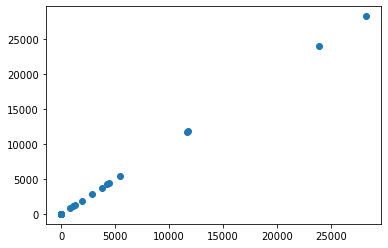

In [811]:
#Scatter Plot
plt.scatter(x=y_test,y=BR_pred)

# Model for Death

In [812]:
#Input and target varialbel
X_death=new_df.drop(['Deaths'],axis=1)
Y_death=new_df[['Deaths']]

In [813]:
print(X_death.shape)
print(Y_death.shape)

(56, 11)
(56, 1)


### Scaling

In [814]:
#scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX_death=sc.fit_transform(X_death)

In [815]:
#Finding best model
best_rstate_death=0
accu_death=0
best_model_death=[]
mod_death=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),SVR(), BayesianRidge()]
for i in range(1,200):
    x_train_death,x_test_death,y_train_death,y_test_death=train_test_split(ScaledX_death,Y_death,test_size=0.33,random_state=i)
    for mo in mod_death:
        mo.fit(x_train_death,y_train_death.values.ravel())
        y_pred_death=mo.predict(x_test_death)
        tempaccu_death=r2_score(y_test_death,y_pred_death)
        if tempaccu_death>accu_death:
            accu_death=tempaccu_death
            best_rstate_death=i
            best_model_death=mo
            print(f"best accuracy : {accu*100} found on the random state {best_rstate}, best model is {mo}")
            
print(f"-----best accuracy : {accu*100} found on the random state {best_rstate}, best model is {mo}----")

best accuracy : 100.0 found on the random state 1, best model is LinearRegression()
-----best accuracy : 100.0 found on the random state 1, best model is BayesianRidge()----


Observation :

BayesianRidge is the best model but it is overfitted.

In [816]:
#Grid Search CV for Random forest regressor
from sklearn.model_selection import GridSearchCV

x_train_death,x_test_death,y_train_death,y_test_death=train_test_split(ScaledX_death,Y_death,test_size=0.33,random_state=1)
parameters_death ={
    'alpha_1': [1, 10],
    'fit_intercept':(0,1.99)
}
            
GCV_death=GridSearchCV(BayesianRidge(), parameters_death,cv=3,n_jobs=-1)
GCV_death.fit(x_train_death,y_train_death.values.ravel())
GCV_pred_death=GCV_death.predict(x_test_death)
print("r2 score is ",r2_score(y_test_death,GCV_pred_death))
print("best score is ",GCV_death.best_score_)
print("best estimator is ",GCV_death.best_estimator_)
print("best param is ",GCV_death.best_params_)

r2 score is  0.9573862222460227
best score is  0.126094673108022
best estimator is  BayesianRidge(alpha_1=10, fit_intercept=1.99)
best param is  {'alpha_1': 10, 'fit_intercept': 1.99}


In [819]:
#Best parameter for Random forest regressor
BR_death=BayesianRidge(alpha_1=10, fit_intercept=1.99)
BR_death.fit(x_train_death,y_train_death.values.ravel())
BR_pred_death=BR_death.predict(x_test_death)
print("r2 score is ",r2_score(y_test_death,BR_pred_death))

r2 score is  0.9573862222460227


In [838]:
#Final CV score and accuracy score
lssscore_selected_death=cross_val_score(BR_death,ScaledX_death,Y_death,cv=2).mean()
print("The CV score is",lssscore_selected_death)

The CV score is 0.8357540309465301


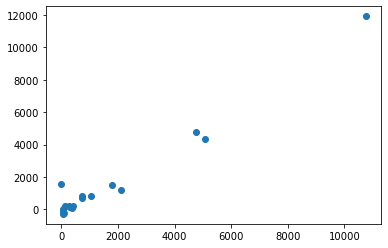

In [839]:
#Scatter Plot
plt.scatter(x=y_test_death,y=BR_pred_death)

# Saving Model

In [840]:
#save the model 
import pickle

#Regression Model
filename='Covid Recovered.pkl'
pickle.dump(BR,open(filename,'wb'))

#Classification Model
filename='Covid Death.pkl'
pickle.dump(BR_death,open(filename,'wb'))

# Conclusion

We did exploratory data analysis by removing columns, calculating missing recovered data and label encoding.

Visualized data by univariate and bivariate analysis.

Checked correlation and visualized using heatmap.

Scaled the data using standard scaler method.

BayesianRidge is the best model for both Recovered prediction and Death Prediction.

Performed Hyperparameter tuning for BayesianRidge.

Final score for Recovered prediction :

              *  r2 score is  1.0

              * The CV score is 1.0

Final score for Death Prediction :

                *  r2 score is  0.9573862222460227

                *  The CV score is 0.8357540309465301

Finally, Saved both the model.